In [7]:
import pandas as pd

datafile = r"../data/data.csv"
df = pd.read_csv(datafile, encoding="latin1")
import pandas as pd



# Überblick über die Daten
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
import pandas as pd

datafile = r"../data/data.csv"
df = pd.read_csv(datafile, encoding="latin1")

df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Neue Spalte: Gesamtpreis
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Datum konvertieren
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Entferne Rücksendungen
df = df[df["Quantity"] > 0]

# Entferne fehlende Kunden
df = df.dropna(subset=["CustomerID"])


In [11]:
# Gesamtumsatz
df["TotalPrice"].sum()

# Durchschnittlicher Warenkorbwert
df.groupby("InvoiceNo")["TotalPrice"].sum().mean()


480.7621873111782

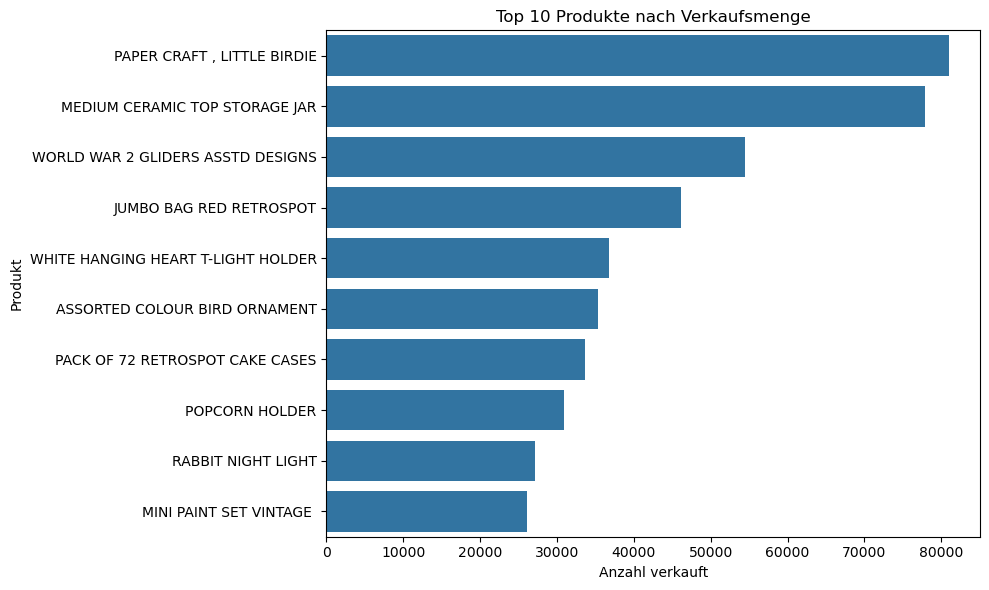

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top-Produkte nach Menge
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Produkte nach Verkaufsmenge")
plt.xlabel("Anzahl verkauft")
plt.ylabel("Produkt")
plt.tight_layout()
plt.show()


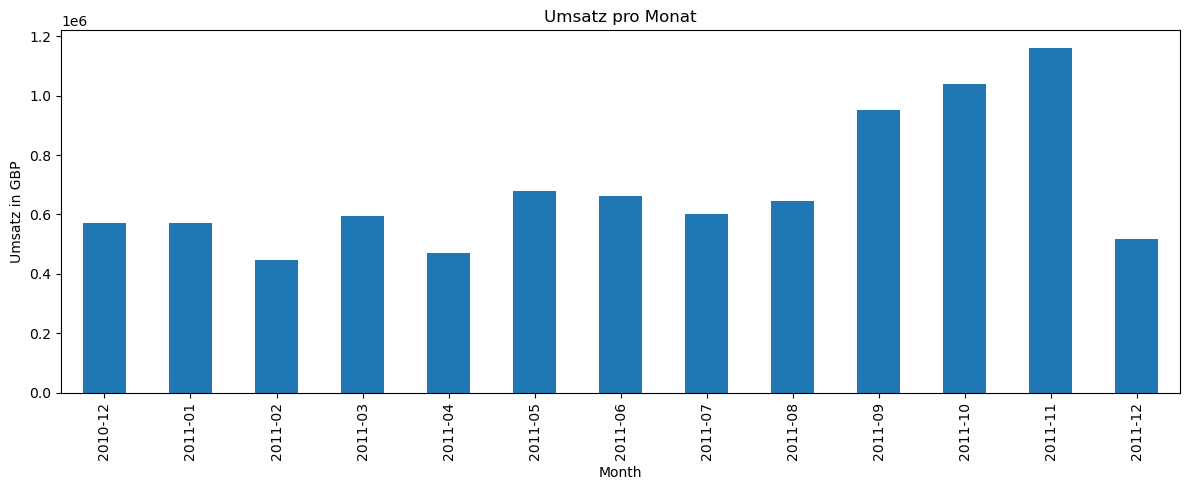

In [13]:
# Umsatz nach Monat
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(kind="bar", figsize=(12,5), title="Umsatz pro Monat")
plt.ylabel("Umsatz in GBP")
plt.tight_layout()
plt.show()


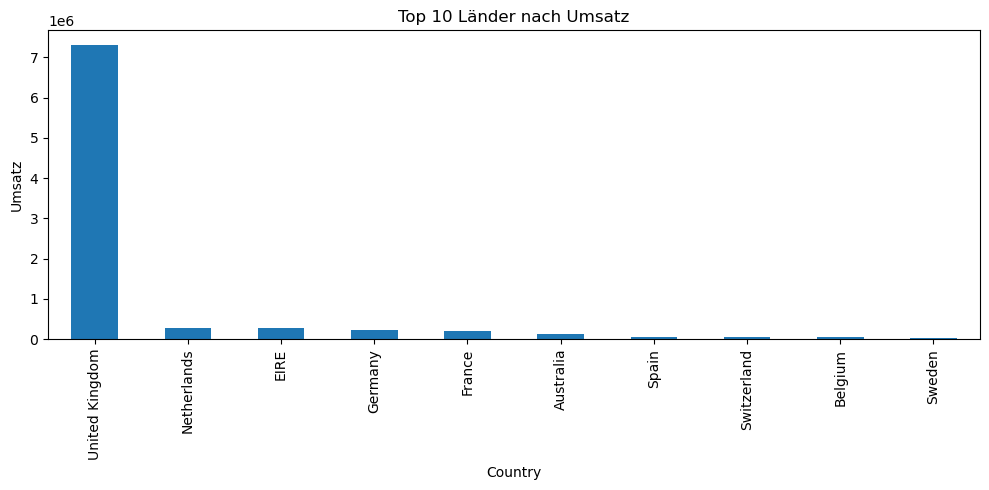

In [14]:
country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)

country_sales.head(10).plot(kind="bar", figsize=(10,5), title="Top 10 Länder nach Umsatz")
plt.ylabel("Umsatz")
plt.tight_layout()
plt.show()


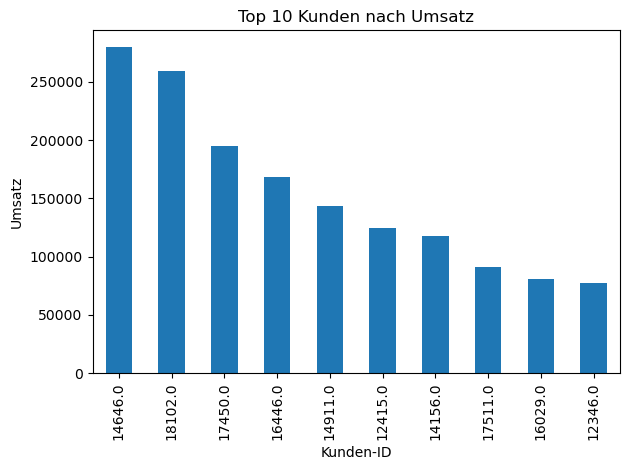

In [15]:
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", title="Top 10 Kunden nach Umsatz")
plt.xlabel("Kunden-ID")
plt.ylabel("Umsatz")
plt.tight_layout()
plt.show()
